In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ostrovnoy
Processing Record 2 of Set 1 | asyut
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | ruteng
Processing Record 5 of Set 1 | kapoeta
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | tulcea
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | beringovskiy
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | pinega
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | batagay-alyta
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | bardiyah
Processing Record 21 of Set 1 | kirakira
Processing Record 22 of

Processing Record 36 of Set 4 | kavaratti
Processing Record 37 of Set 4 | husavik
Processing Record 38 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | poum
Processing Record 41 of Set 4 | atocha
Processing Record 42 of Set 4 | te anau
Processing Record 43 of Set 4 | qurayyat
Processing Record 44 of Set 4 | walvis bay
Processing Record 45 of Set 4 | altamira
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | diyarb najm
Processing Record 49 of Set 4 | coite do noia
Processing Record 50 of Set 4 | prince rupert
Processing Record 1 of Set 5 | iwanai
Processing Record 2 of Set 5 | talcahuano
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | celestun
Processing Record 5 of Set 5 | chulumani
Processing Record 6 of Set 5 | liesveld
Processing Record 7 of Set 5 | natal
Processing Record 8 of Set 5 | georgetow

Processing Record 26 of Set 8 | kyshtovka
Processing Record 27 of Set 8 | roswell
Processing Record 28 of Set 8 | roma
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | bousso
Processing Record 31 of Set 8 | le vauclin
Processing Record 32 of Set 8 | kardla
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | hofn
Processing Record 35 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 36 of Set 8 | russkiy kameshkir
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | hualmay
Processing Record 39 of Set 8 | macusani
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | adelaide
Processing Record 42 of Set 8 | frutal
Processing Record 43 of Set 8 | makakilo city
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | bolilao
Processing Record 46 of Set 8 | siyabuswa
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8 | rincon
Processing Record 49 of Set 8 | 

Processing Record 14 of Set 12 | rungata
City not found. Skipping...
Processing Record 15 of Set 12 | khorramshahr
Processing Record 16 of Set 12 | letka
Processing Record 17 of Set 12 | amlame
Processing Record 18 of Set 12 | high level
Processing Record 19 of Set 12 | vostok
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | watertown
Processing Record 22 of Set 12 | novoutkinsk
Processing Record 23 of Set 12 | long xuyen
Processing Record 24 of Set 12 | sokoni
Processing Record 25 of Set 12 | turbat
Processing Record 26 of Set 12 | nguiu
City not found. Skipping...
Processing Record 27 of Set 12 | lahij
Processing Record 28 of Set 12 | moindou
Processing Record 29 of Set 12 | berlevag
Processing Record 30 of Set 12 | tura
Processing Record 31 of Set 12 | kalabo
Processing Record 32 of Set 12 | coahuayana
Processing Record 33 of Set 12 | seoul
Processing Record 34 of Set 12 | san felipe
Processing Record 35 of Set 12 | barbar
City not found. Skipping...


In [15]:
len(city_data)


554

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,27.73,88,99,23.71,RU,2021-10-24 14:32:48
1,Asyut,27.1810,31.1837,82.33,21,0,17.78,EG,2021-10-24 14:29:57
2,Puerto Ayora,-0.7393,-90.3518,71.56,84,96,9.06,EC,2021-10-24 14:32:48
3,Ruteng,-8.6136,120.4721,63.84,95,98,1.39,ID,2021-10-24 14:32:49
4,Kapoeta,4.7717,33.5903,93.13,27,83,12.03,SS,2021-10-24 14:30:24
5,Cherskiy,68.7500,161.3000,-9.31,97,100,5.84,RU,2021-10-24 14:32:49
6,Provideniya,64.3833,-173.3000,19.36,82,64,7.54,RU,2021-10-24 14:32:50
7,Codrington,-38.2667,141.9667,51.10,57,100,13.02,AU,2021-10-24 14:32:50
8,Tulcea,45.1667,28.8000,53.98,44,0,13.80,RO,2021-10-24 14:32:50
9,Bredasdorp,-34.5322,20.0403,67.28,45,1,12.01,ZA,2021-10-24 14:32:51


In [21]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        554 non-null    object 
 1   Lat         554 non-null    float64
 2   Lng         554 non-null    float64
 3   Max Temp    554 non-null    float64
 4   Humidity    554 non-null    int64  
 5   Cloudiness  554 non-null    int64  
 6   Wind Speed  554 non-null    float64
 7   Country     554 non-null    object 
 8   Date        554 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.1+ KB


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2021-10-24 14:32:48,68.0531,39.5131,27.73,88,99,23.71
1,Asyut,EG,2021-10-24 14:29:57,27.1810,31.1837,82.33,21,0,17.78
2,Puerto Ayora,EC,2021-10-24 14:32:48,-0.7393,-90.3518,71.56,84,96,9.06
3,Ruteng,ID,2021-10-24 14:32:49,-8.6136,120.4721,63.84,95,98,1.39
4,Kapoeta,SS,2021-10-24 14:30:24,4.7717,33.5903,93.13,27,83,12.03


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

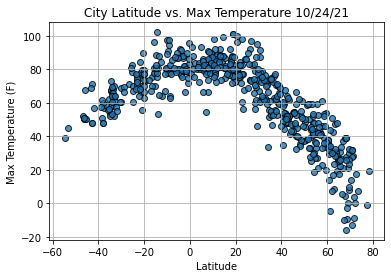

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

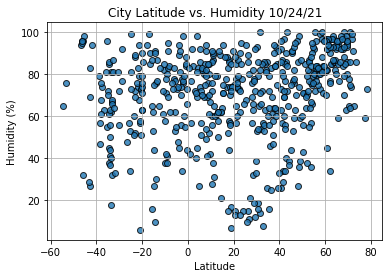

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

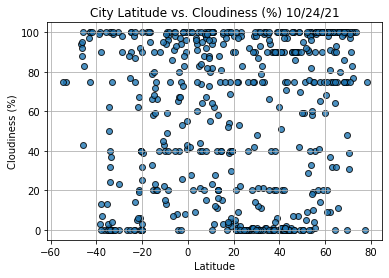

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

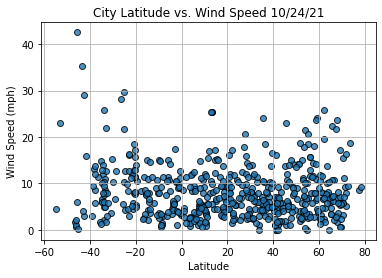

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()